<div style="margin: 2em 5em 0 0;">
    
<p>
   <span style="margin-left: 17%; vertical-align: text-bottom;">&nbsp;&bullet;&nbsp; Business Analytics &nbsp;&bullet;&nbsp; Machine Learning - FMsBA3 &nbsp;&bullet;&nbsp; Hult International Business School</span>
</p>
<br>
<hr style="height: 1px; margin-top: -.2em">


<center>
   <br>
   <span style="font-size: 155%; font-weight: bold; font-family: "Times New Roman", Times, serif;">
      Regression Model Development | Apprentice Chef Case
   </span>
   <br>
   <br>
   <div style="font-size: 107%; margin-top: .3em">
      <b>Instructor: Prof. Chase Kusterer</b>
      <br style="margin-bottom: .5em">
      <b>Ohyoung Kim </b><br>
      <br>
   </div>
</center>


## 0. Importing Dataset

In [1]:
# Importing libraries
import numpy as np                    # mathematical essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import pandas as pd                   # data science essentials
import gender_guesser.detector as gender # guess gender based on (given) name
from sklearn.model_selection import train_test_split # train/test split
import statsmodels.formula.api as smf # regression modeling
import sklearn.linear_model # linear models
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)

In [2]:
# Setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Specifying file name
file = './Apprentice_Chef_Dataset.xlsx'

# Reading the file into Python
chef_df = pd.read_excel(io = file)

# Checking the first 5 rows of the dataset
chef_df.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


## 1. Exploring the Dataset

### 1.1 Initial Exploration of the Dataset

In [3]:
# Checking the number of observations and the number of features
#chef_df.shape

In [4]:
# Checking the name of observations
chef_df.keys()

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'], dtype='object')

In [5]:
# Checking information about each variable
#chef_df.info()

### 1.2 Exploring Y-variable(REVENUE)

#### 1.2.1 Checking the distribution of REVENUE: Be skewed positive

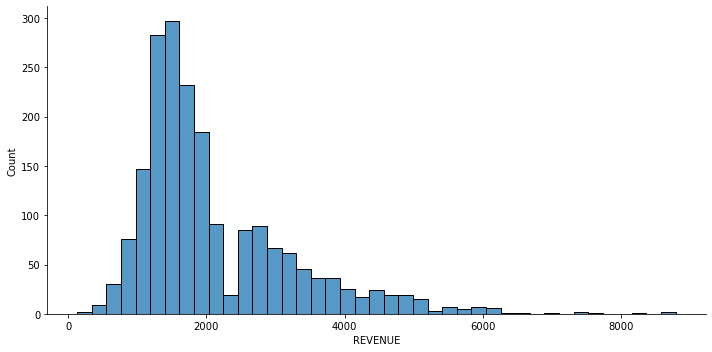

In [6]:
# Developing a histogram
sns.displot(data = chef_df, x = 'REVENUE', height = 5, aspect = 2)

# Displaying the histogram
plt.show()

#### 1.2.2 Log transforming the REVENUE to make it normally distributed

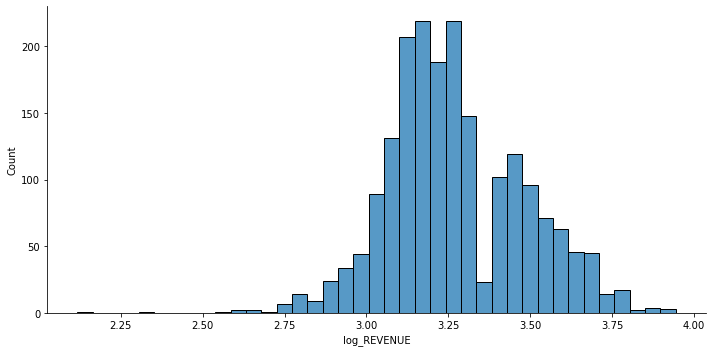

In [7]:
# Log transforming and saving it to the dataset
chef_df['log_REVENUE'] = np.log10(chef_df['REVENUE'])

# Developing a histogram
sns.displot(data = chef_df, x = 'log_REVENUE', height = 5, aspect = 2)

# Displaying the histogram
plt.show()

### 1.3 Grouping the Dataset columns

### 1.4 Exploring Continuous X-variables

#### 1.4.1 Checking the distribution: Both are skewed positive

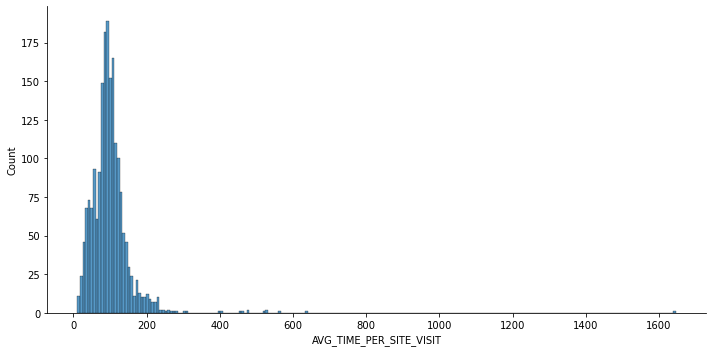

In [8]:
# Developing a histogram
sns.displot(data = chef_df, x = 'AVG_TIME_PER_SITE_VISIT', height = 5, aspect = 2)

# Displaying the histogram
#plt.show()

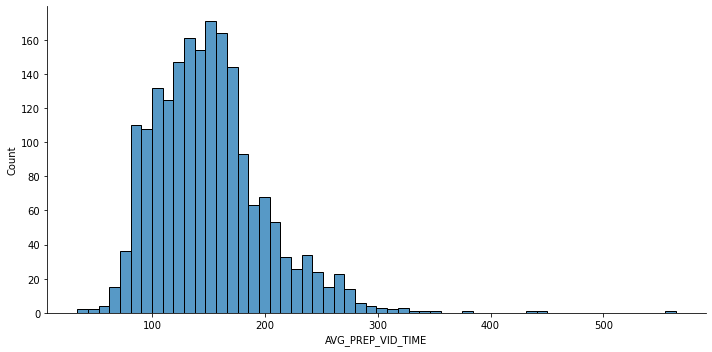

In [9]:
# Developing a histogram
sns.displot(data = chef_df, x = 'AVG_PREP_VID_TIME', height = 5, aspect = 2)

# Displaying the histogram
#plt.show()

#### 1.4.2 Log transforming the both variables to make them normally distributed

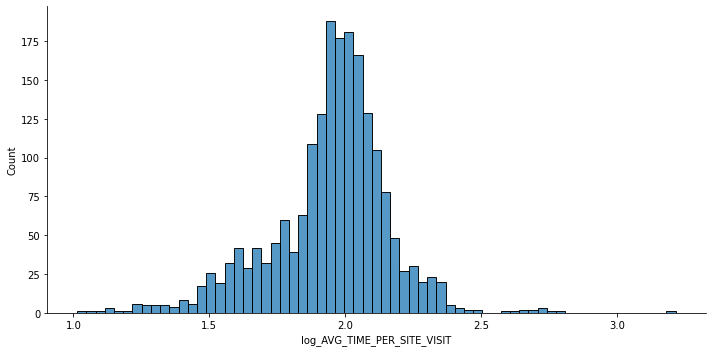

In [10]:
# Log transforming and saving it to the dataset
chef_df['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(chef_df['AVG_TIME_PER_SITE_VISIT'])

# Developing a histogram
sns.displot(data = chef_df, x = 'log_AVG_TIME_PER_SITE_VISIT', height = 5, aspect = 2)

# Displaying the histogram
#plt.show()

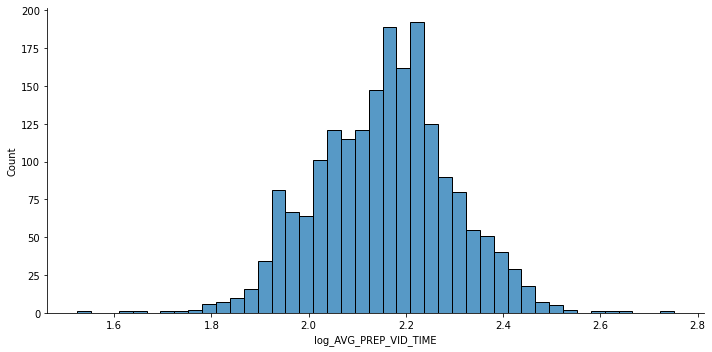

In [11]:
# Log transforming and saving it to the dataset
chef_df['log_AVG_PREP_VID_TIME'] = np.log10(chef_df['AVG_PREP_VID_TIME'])

# Developing a histogram
sns.displot(data = chef_df, x = 'log_AVG_PREP_VID_TIME', height = 5, aspect = 2)

# Displaying the histogram
#plt.show()

#### 1.4.3 Scatter plots between the X-variables and REVENUE

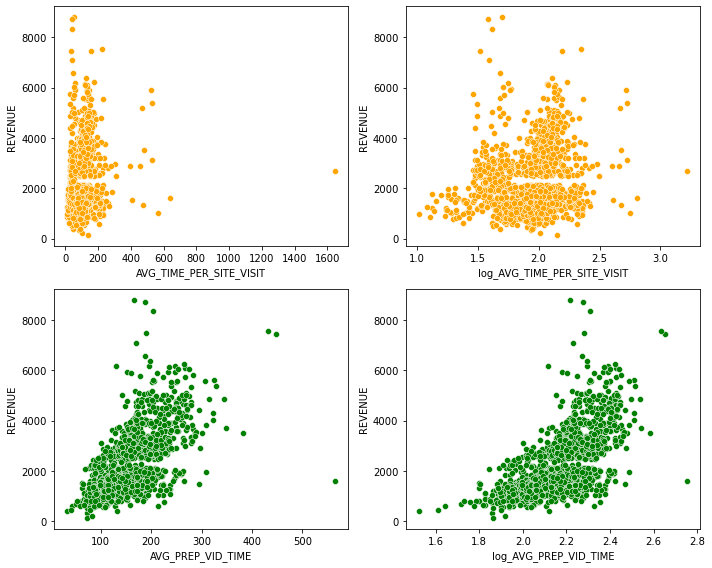

In [12]:
# Setting figure size
fig, ax = plt.subplots(figsize = (10, 8))

# Developing a scatterplot : Original X, Original Y 
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef_df['AVG_TIME_PER_SITE_VISIT'],
                y = chef_df['REVENUE'],
                color = 'orange')

# Adding labels
plt.xlabel(xlabel = 'AVG_TIME_PER_SITE_VISIT')
plt.ylabel(ylabel = 'REVENUE')

########################

# Developing a scatterplot : Log X, Original Y 
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef_df['log_AVG_TIME_PER_SITE_VISIT'],
                y = chef_df['REVENUE'],
                color = 'orange')

# Adding labels
plt.xlabel(xlabel = 'log_AVG_TIME_PER_SITE_VISIT')
plt.ylabel(ylabel = 'REVENUE')

########################

# Developing a scatterplot : Original X, Original Y 
plt.subplot(2, 2, 3)
sns.scatterplot(x = chef_df['AVG_PREP_VID_TIME'],
                y = chef_df['REVENUE'],
                color = 'g')

# Adding labels
plt.xlabel(xlabel = 'AVG_PREP_VID_TIME')
plt.ylabel(ylabel = 'REVENUE')

########################

# Developing a scatterplot : Log X, Original Y 
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef_df['log_AVG_PREP_VID_TIME'],
                y = chef_df['REVENUE'],
                color = 'g')

# Adding labels
plt.xlabel(xlabel = 'log_AVG_PREP_VID_TIME')
plt.ylabel(ylabel = 'REVENUE')

# Cleaning up the layout and displaying the results
plt.tight_layout()
#plt.show()

### 1.5 Exploring Interval and Count X-variables

#### 1.5.1 TOTAL_PHOTOS_VIEWED & WEEKLY_PLAN

##### 1.5.1.1 Scatter plot between TOTAL_PHOTOS_VIEWED and REVENUE

Text(0, 0.5, 'REVENUE')

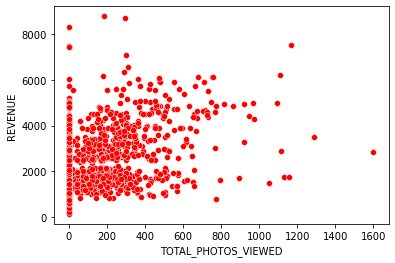

In [13]:
# Developing a scatterplot : Original X, Original Y 
sns.scatterplot(x = chef_df['TOTAL_PHOTOS_VIEWED'],
                y = chef_df['REVENUE'], color = 'r')

# Adding labels
plt.xlabel(xlabel = 'TOTAL_PHOTOS_VIEWED')
plt.ylabel(ylabel = 'REVENUE')

# Displaying the scatterplot
#plt.show()

##### 1.5.1.2 Boxplot between WEEKLY_PLAN and REVENUE

Text(0, 0.5, 'REVENUE')

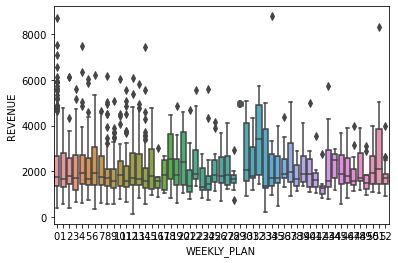

In [14]:
# Developing a boxplot : Original X, Original Y 
sns.boxplot(x = chef_df['WEEKLY_PLAN'], y = chef_df['REVENUE'])

# Adding labels
plt.xlabel(xlabel = 'WEEKLY_PLAN')
plt.ylabel(ylabel = 'REVENUE')

# Displaying the boxplot
#plt.show()

##### 1.5.1.3 Flag-Based Feature Engineering

In [15]:
# Counting the number of zeroes
TOTAL_PHOTOS_VIEWED_zeroes = len(chef_df['TOTAL_PHOTOS_VIEWED'][chef_df['TOTAL_PHOTOS_VIEWED'] == 0])
WEEKLY_PLAN_zeroes = len(chef_df['WEEKLY_PLAN'][chef_df['WEEKLY_PLAN'] == 0])

# Printing a table of the results
print(f"""
                             No(0)\tYes
                          ---------------------
TOTAL_PHOTOS_VIEWED       | {TOTAL_PHOTOS_VIEWED_zeroes}\t{len(chef_df) - TOTAL_PHOTOS_VIEWED_zeroes}
WEEKLY_PLAN               | {WEEKLY_PLAN_zeroes}\t\t{len(chef_df) - WEEKLY_PLAN_zeroes}
""")


                             No(0)	Yes
                          ---------------------
TOTAL_PHOTOS_VIEWED       | 1140	806
WEEKLY_PLAN               | 468		1478



In [16]:
# Adding dummy variable
chef_df['has_TOTAL_PHOTOS_VIEWED'] = 0
chef_df['has_WEEKLY_PLAN'] = 0

# Iterating over each original column to change values in the new feature columns
for index, value in chef_df.iterrows():
    
    # TOTAL_PHOTOS_VIEWED
    if chef_df.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        chef_df.loc[index, 'has_TOTAL_PHOTOS_VIEWED'] = 1 

    # WEEKLY_PLAN
    if chef_df.loc[index, 'WEEKLY_PLAN'] > 0:
        chef_df.loc[index, 'has_WEEKLY_PLAN'] = 1

In [17]:
# Developing a small correlation matrix
zeroes_corr = chef_df.corr()

# Checking the correlations of the newly-created variables with REVENUE
zeroes_corr.loc['REVENUE', ['has_TOTAL_PHOTOS_VIEWED', 'has_WEEKLY_PLAN']].sort_values(ascending = False)

has_TOTAL_PHOTOS_VIEWED    0.372072
has_WEEKLY_PLAN           -0.032196
Name: REVENUE, dtype: float64

#### 1.5.2 TOTAL_MEALS_ORDERED

##### 1.5.2.1 Scatter plots between the X-variable and REVENUE

Text(0, 0.5, 'REVENUE')

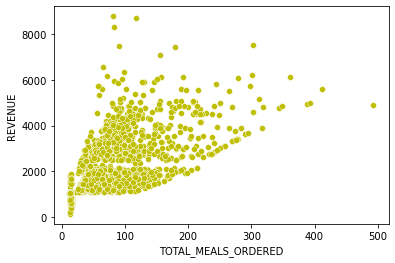

In [18]:
# Developing a scatterplot : Original X, Original Y 
sns.scatterplot(x = chef_df['TOTAL_MEALS_ORDERED'],
                y = chef_df['REVENUE'], color = 'y')

# Adding labels
plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'REVENUE')

# Displaying the scatterplot
#plt.show()

##### 1.5.2.2 Feature Engineering: Log transform

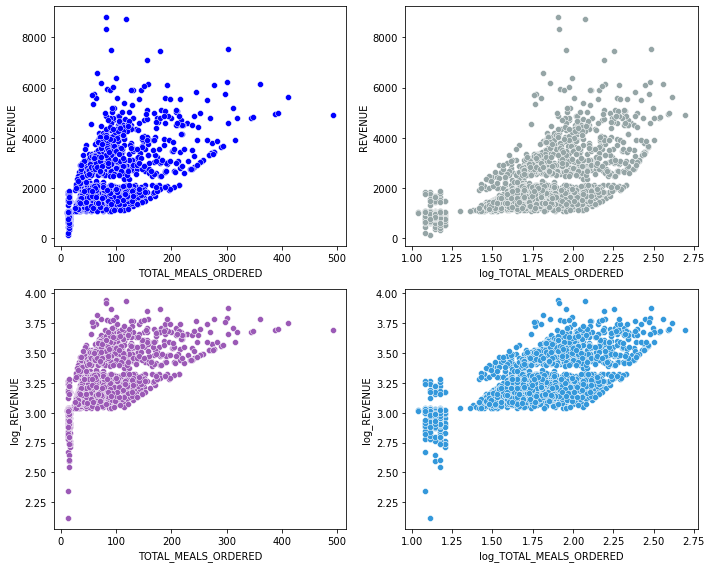

In [19]:
# Log transforming interval data, saving this new variable to the chef_df dataset
chef_df['log_TOTAL_MEALS_ORDERED'] = np.log10(chef_df['TOTAL_MEALS_ORDERED'])


# Setting figure size
fig, ax = plt.subplots(figsize = (10, 8))

# Developing a scatterplot : Original X, Original Y
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef_df['TOTAL_MEALS_ORDERED'],
                y = chef_df['REVENUE'],
                color = 'b')

# Adding labels
plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'REVENUE')

########################

# Developing a scatterplot : Log X, Original Y 
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef_df['log_TOTAL_MEALS_ORDERED'],
                y = chef_df['REVENUE'],
                color = '#95a5a6')

# Adding labels
plt.xlabel(xlabel = 'log_TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'REVENUE')

########################

# Developing a scatterplot : Original X, Log Y 
plt.subplot(2, 2, 3)
sns.scatterplot(x = chef_df['TOTAL_MEALS_ORDERED'],
                y = chef_df['log_REVENUE'],
                color = '#9b59b6')

# Adding labels
plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'log_REVENUE')

########################

# Developing a scatterplot : Log X, Log Y 
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef_df['log_TOTAL_MEALS_ORDERED'],
                y = chef_df['log_REVENUE'],
                color = '#3498db')

# Adding labels
plt.xlabel(xlabel = 'log_TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'log_REVENUE')

# Cleaning up the layout and displaying the results
plt.tight_layout()
#plt.show()

#### 1.5.3 Other X-variables

##### 1.5.3.1 Boxplots between the X-variables and REVENUE

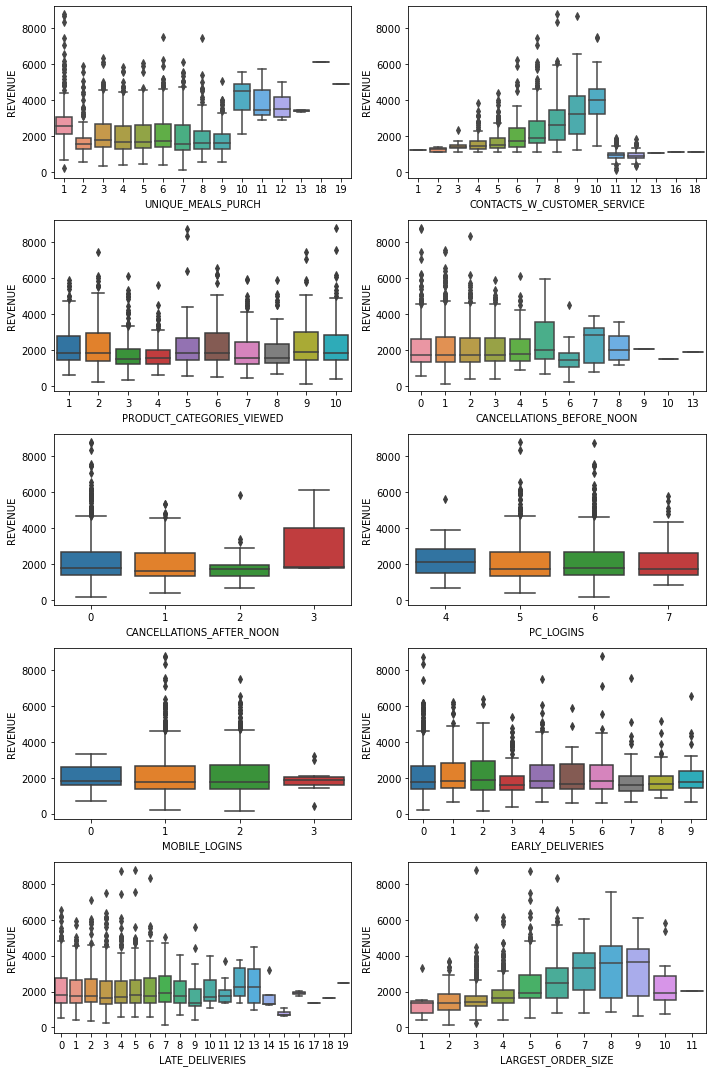

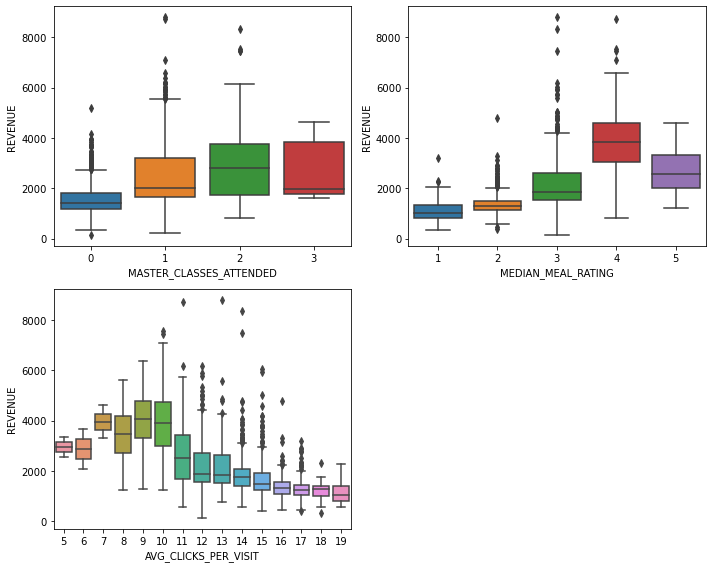

In [20]:
# Setting figure size
fig, ax = plt.subplots(figsize = (10, 15))

# Developing a boxplot
plt.subplot(5, 2, 1)
sns.boxplot(x = chef_df['UNIQUE_MEALS_PURCH'], y = chef_df['REVENUE'])

# Adding labels
plt.xlabel(xlabel = 'UNIQUE_MEALS_PURCH')
plt.ylabel(ylabel = 'REVENUE')

########################

# Developing a boxplot
plt.subplot(5, 2, 2)
sns.boxplot(x = chef_df['CONTACTS_W_CUSTOMER_SERVICE'], y = chef_df['REVENUE'])

# Adding labels
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'REVENUE')

########################

# Developing a boxplot
plt.subplot(5, 2, 3)
sns.boxplot(x = chef_df['PRODUCT_CATEGORIES_VIEWED'], y = chef_df['REVENUE'])

# Adding labels
plt.xlabel(xlabel = 'PRODUCT_CATEGORIES_VIEWED')
plt.ylabel(ylabel = 'REVENUE')

########################

# Developing a boxplot
plt.subplot(5, 2, 4)
sns.boxplot(x = chef_df['CANCELLATIONS_BEFORE_NOON'], y = chef_df['REVENUE'])

# Adding labels
plt.xlabel(xlabel = 'CANCELLATIONS_BEFORE_NOON')
plt.ylabel(ylabel = 'REVENUE')

########################

# Developing a boxplot
plt.subplot(5, 2, 5)
sns.boxplot(x = chef_df['CANCELLATIONS_AFTER_NOON'], y = chef_df['REVENUE'])

# Adding labels
plt.xlabel(xlabel = 'CANCELLATIONS_AFTER_NOON')
plt.ylabel(ylabel = 'REVENUE')

########################

# Developing a boxplot
plt.subplot(5, 2, 6)
sns.boxplot(x = chef_df['PC_LOGINS'], y = chef_df['REVENUE'])

# Adding labels
plt.xlabel(xlabel = 'PC_LOGINS')
plt.ylabel(ylabel = 'REVENUE')

########################

# Developing a boxplot
plt.subplot(5, 2, 7)
sns.boxplot(x = chef_df['MOBILE_LOGINS'], y = chef_df['REVENUE'])

# Adding labels
plt.xlabel(xlabel = 'MOBILE_LOGINS')
plt.ylabel(ylabel = 'REVENUE')

########################

# Developing a boxplot
plt.subplot(5, 2, 8)
sns.boxplot(x = chef_df['EARLY_DELIVERIES'], y = chef_df['REVENUE'])

# Adding labels
plt.xlabel(xlabel = 'EARLY_DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')

########################

# Developing a boxplot
plt.subplot(5, 2, 9)
sns.boxplot(x = chef_df['LATE_DELIVERIES'], y = chef_df['REVENUE'])

# Adding labels
plt.xlabel(xlabel = 'LATE_DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')

########################

# Developing a boxplot
plt.subplot(5, 2, 10)
sns.boxplot(x = chef_df['LARGEST_ORDER_SIZE'], y = chef_df['REVENUE'])

# Adding labels
plt.xlabel(xlabel = 'LARGEST_ORDER_SIZE')
plt.ylabel(ylabel = 'REVENUE')

# Cleaning up the layout and displaying the results
plt.tight_layout()
plt.show()

########################
 
# Setting figure size
fig, ax = plt.subplots(figsize = (10, 8))

# Developing a boxplot
plt.subplot(2, 2, 1)
sns.boxplot(x = chef_df['MASTER_CLASSES_ATTENDED'], y = chef_df['REVENUE'])

# Adding labels
plt.xlabel(xlabel = 'MASTER_CLASSES_ATTENDED')
plt.ylabel(ylabel = 'REVENUE')

########################

# Developing a boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x = chef_df['MEDIAN_MEAL_RATING'], y = chef_df['REVENUE'])

# Adding labels
plt.xlabel(xlabel = 'MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'REVENUE')

########################

# Developing a boxplot
plt.subplot(2, 2, 3)
sns.boxplot(x = chef_df['AVG_CLICKS_PER_VISIT'], y = chef_df['REVENUE'])

# Adding labels
plt.xlabel(xlabel = 'AVG_CLICKS_PER_VISIT')
plt.ylabel(ylabel = 'REVENUE')

# Cleaning up the layout and displaying the results
plt.tight_layout()
#plt.show()

##### 1.5.3.2 Feature Engineering: Log transform

In [21]:
# Log transforming interval data, saving this new variable to the chef_df dataset
chef_df['log_UNIQUE_MEALS_PURCH'] = np.log10(chef_df['UNIQUE_MEALS_PURCH'])
chef_df['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(chef_df['CONTACTS_W_CUSTOMER_SERVICE'])
chef_df['log_LARGEST_ORDER_SIZE'] = np.log10(chef_df['LARGEST_ORDER_SIZE'])
chef_df['log_MEDIAN_MEAL_RATING'] = np.log10(chef_df['MEDIAN_MEAL_RATING'])
chef_df['log_AVG_CLICKS_PER_VISIT'] = np.log10(chef_df['AVG_CLICKS_PER_VISIT'])


# Checking the correlations of the newly-created variables with REVENUE/log_REVENUE
log_corr = chef_df.loc[ : , ['UNIQUE_MEALS_PURCH', 'log_UNIQUE_MEALS_PURCH',
                             'CONTACTS_W_CUSTOMER_SERVICE', 'log_CONTACTS_W_CUSTOMER_SERVICE',
                             'LARGEST_ORDER_SIZE', 'log_LARGEST_ORDER_SIZE',
                             'MEDIAN_MEAL_RATING', 'log_MEDIAN_MEAL_RATING',
                             'AVG_CLICKS_PER_VISIT', 'log_AVG_CLICKS_PER_VISIT',                             
                             'REVENUE', 'log_REVENUE']  ].corr(method = 'pearson').round(decimals = 2)

# Checking result as a dataframe
log_corr.loc[['UNIQUE_MEALS_PURCH', 'log_UNIQUE_MEALS_PURCH',
              'CONTACTS_W_CUSTOMER_SERVICE', 'log_CONTACTS_W_CUSTOMER_SERVICE',
              'LARGEST_ORDER_SIZE', 'log_LARGEST_ORDER_SIZE',
              'MEDIAN_MEAL_RATING', 'log_MEDIAN_MEAL_RATING',
              'AVG_CLICKS_PER_VISIT', 'log_AVG_CLICKS_PER_VISIT'],
             ['REVENUE', 'log_REVENUE']]

,REVENUE,log_REVENUE
UNIQUE_MEALS_PURCH,-0.06,-0.08
log_UNIQUE_MEALS_PURCH,-0.12,-0.13
CONTACTS_W_CUSTOMER_SERVICE,0.10,-0.04
log_CONTACTS_W_CUSTOMER_SERVICE,0.17,0.05
LARGEST_ORDER_SIZE,0.44,0.45
log_LARGEST_ORDER_SIZE,0.42,0.45
MEDIAN_MEAL_RATING,0.61,0.65
log_MEDIAN_MEAL_RATING,0.55,0.61
AVG_CLICKS_PER_VISIT,-0.55,-0.58
log_AVG_CLICKS_PER_VISIT,-0.56,-0.58


#### 1.5.4 Feature Engineering - Combining Features

##### 1.5.4.1 A new variable: non_unique_meals_purch

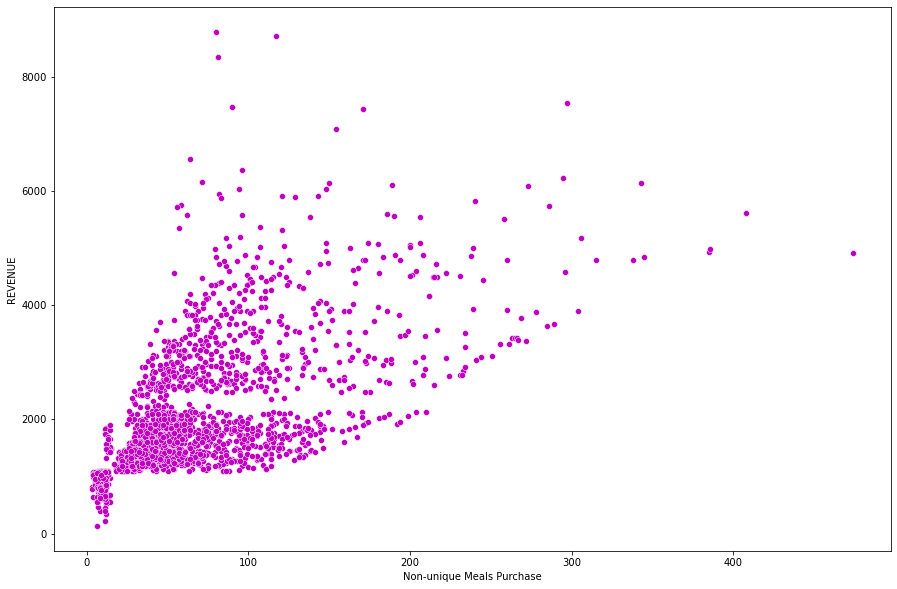


-------------------------
MEALS ORDERED Correlations
-------------------------
TOTAL_MEALS_ORDERED       0.60
UNIQUE_MEALS_PURCH       -0.06
non_unique_meals_purch    0.61
REVENUE                   1.00
Name: REVENUE, dtype: float64



In [22]:
# Creating a new variable and saving this new variable to the chef_df dataset
chef_df['non_unique_meals_purch'] = chef_df['TOTAL_MEALS_ORDERED'] - chef_df['UNIQUE_MEALS_PURCH']

# Setting figure size
fig, ax = plt.subplots(figsize = (15, 10))

# Developing a scatterplot
sns.scatterplot(x = chef_df['non_unique_meals_purch'], y = chef_df['REVENUE'], color = 'm')

# Adding labels
plt.xlabel(xlabel = 'Non-unique Meals Purchase')
plt.ylabel(ylabel = 'REVENUE')

# Displaying the scatterplot
plt.show()

# Developing a correlation matrix
non_unique_meals_corr = chef_df.loc[ : , ['TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH',
                              'non_unique_meals_purch', 'REVENUE']].corr(method = 'pearson').round(decimals = 2)

# Printing correlations meals ordered
print(f"""
-------------------------
MEALS ORDERED Correlations
-------------------------
{non_unique_meals_corr['REVENUE']}
""")

##### 1.5.4.2 A new variable: Total_cancellations

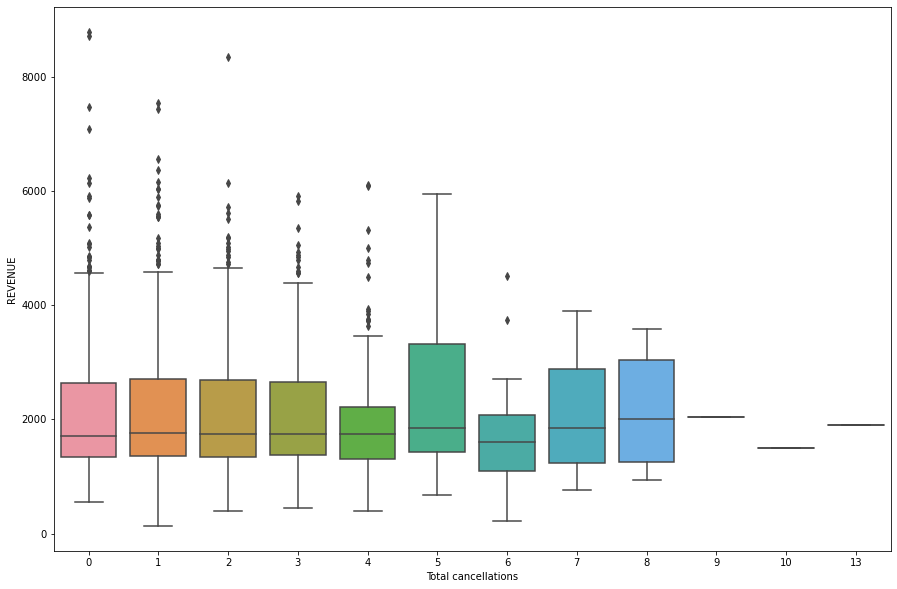


-------------------------
CANCELLATION Correlations
-------------------------
CANCELLATIONS_BEFORE_NOON    0.01
CANCELLATIONS_AFTER_NOON    -0.04
Total_cancellations          0.00
REVENUE                      1.00
Name: REVENUE, dtype: float64



In [23]:
# Creating a new variable and saving this new variable to the chef_df dataset
chef_df['Total_cancellations'] = chef_df['CANCELLATIONS_BEFORE_NOON'] + chef_df['CANCELLATIONS_AFTER_NOON']

# Setting figure size
fig, ax = plt.subplots(figsize = (15, 10))

# Developing a boxplot
sns.boxplot(x = 'Total_cancellations', y = 'REVENUE', data = chef_df)

# Adding labels
plt.xlabel(xlabel = 'Total cancellations')
plt.ylabel(ylabel = 'REVENUE')

# Displaying the boxplot
plt.show()

# Developing a correlation matrix
cancel_corr = chef_df.loc[ : , ['CANCELLATIONS_BEFORE_NOON','CANCELLATIONS_AFTER_NOON',
                              'Total_cancellations', 'REVENUE']].corr(method = 'pearson').round(decimals = 2)

# Printing correlations cancellations
print(f"""
-------------------------
CANCELLATION Correlations
-------------------------
{cancel_corr['REVENUE']}
""")

### 1.6 Exploring Categorical X-variables

#### 1.6.1 Feature Engineering - Encoding: EMAIL(X-variable)

In [24]:
# Splitting emails and concatenating with original DataFrame
chef_df['email_domain'] = chef_df.EMAIL.str.split('@').str[-1]


# Aggregating the email domains into domain groups
# Creating 3 types of email domain
professional_email_domains = ['@mmm.com', '@amex.com', '@apple.com',
                              '@boeing.com', '@caterpillar.com', '@chevron.com',
                              '@cisco.com', '@cocacola.com', '@disney.com', 
                              '@dupont.com', '@exxon.com', '@ge.org', '@goldmansacs.com',
                              '@homedepot.com', '@ibm.com', '@intel.com', '@jnj.com',
                              '@jpmorgan.com', '@mcdonalds.com', '@merck.com', 
                              '@microsoft.com', '@nike.com', '@pfizer.com', 
                              '@pg.com', '@travelers.com', '@unitedtech.com',
                              '@unitedhealth.com', '@verizon.com', '@visa.com', 
                              '@walmart.com']
personal_email_domains = ['@gmail.com', '@yahoo.com', '@protonmail.com']
junk_email_domains = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', 
                      '@msn.com', '@passport.com']

# Creating a placeholder list
placeholder_lst = []

# Looping to group observations by domain types
for domain in chef_df['email_domain']:
        if '@' + domain in professional_email_domains:
            placeholder_lst.append('professional')
            
        elif '@' + domain in personal_email_domains:
            placeholder_lst.append('personal')
            
        elif '@' + domain in junk_email_domains:
            placeholder_lst.append('junk')
            
        else:
            print('unknown')

# Concatenating with original DataFrame
chef_df['domain_group'] = pd.Series(placeholder_lst)

# Checking results
#chef_df['domain_group'].value_counts()

In [25]:
# One hot encoding categorical variables
one_hot_domain = pd.get_dummies(chef_df['domain_group'])

# Dropping categorical variables after they've been encoded
chef_df = chef_df.drop('domain_group', axis = 1)

# Joining codings together
chef_df = chef_df.join([one_hot_domain])

In [26]:
# Developing a correlation matrix
chef_df_corr = chef_df.corr(method = 'pearson')

# Filtering the results to only show correlations with REVENUE
chef_df_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

REVENUE                            1.00
log_REVENUE                        0.95
AVG_PREP_VID_TIME                  0.64
log_AVG_PREP_VID_TIME              0.63
non_unique_meals_purch             0.61
MEDIAN_MEAL_RATING                 0.61
log_TOTAL_MEALS_ORDERED            0.61
TOTAL_MEALS_ORDERED                0.60
log_MEDIAN_MEAL_RATING             0.55
TOTAL_PHOTOS_VIEWED                0.47
MASTER_CLASSES_ATTENDED            0.45
LARGEST_ORDER_SIZE                 0.44
log_LARGEST_ORDER_SIZE             0.42
has_TOTAL_PHOTOS_VIEWED            0.37
log_CONTACTS_W_CUSTOMER_SERVICE    0.17
log_AVG_TIME_PER_SITE_VISIT        0.15
AVG_TIME_PER_SITE_VISIT            0.14
CONTACTS_W_CUSTOMER_SERVICE        0.10
PRODUCT_CATEGORIES_VIEWED          0.03
MOBILE_NUMBER                      0.03
PC_LOGINS                          0.02
CANCELLATIONS_BEFORE_NOON          0.01
TASTES_AND_PREFERENCES             0.01
WEEKLY_PLAN                        0.01
personal                           0.01


## 2. Preparing for Model Development

In [27]:
# Preparing explanatory variable data
rm_chef_df= chef_df.drop(['REVENUE', 'log_REVENUE', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'email_domain'], axis = 1)

# Preparing response variables
chef_df_target = chef_df.loc[ : , 'REVENUE']
log_chef_df_target = chef_df.loc[ : , 'log_REVENUE']


# Preparing training and testing sets with log_REVENUE(Y-variable)
X_train, X_test, y_train, y_test = train_test_split(
            rm_chef_df,
            log_chef_df_target,
            test_size = 0.25, random_state = 219)

# Checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {X_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {X_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 38)
y-side: (1459,)


Testing Data
------------
X-side: (487, 38)
y-side: (487,)



In [28]:
# Declaring set of x-variables
#x_variables = ['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'log_AVG_TIME_PER_SITE_VISIT', 'log_AVG_PREP_VID_TIME', 'has_TOTAL_PHOTOS_VIEWED', 'has_WEEKLY_PLAN', 'log_TOTAL_MEALS_ORDERED', 'log_UNIQUE_MEALS_PURCH', 'log_CONTACTS_W_CUSTOMER_SERVICE', 'log_LARGEST_ORDER_SIZE', 'log_MEDIAN_MEAL_RATING', 'log_AVG_CLICKS_PER_VISIT', 'non_unique_meals_purch', 'Total_cancellations', 'email_domain', 'junk', 'personal', 'professional']

# Looping to make x-variables suitable for statsmodels
#for val in x_variables:
#    print(f"{val} +")

## 3. OLS Regression (standard linear regression) -- Final Model

In [29]:
# Merging X_train and y_train so that they can be used in statsmodels
df_train = pd.concat([X_train, y_train], axis = 1)

# Step 1: Building a model
lm_best = smf.ols(formula = """ log_REVENUE ~ CROSS_SELL_SUCCESS +
                                            TOTAL_MEALS_ORDERED +
                                            UNIQUE_MEALS_PURCH +
                                            CONTACTS_W_CUSTOMER_SERVICE +
                                            PRODUCT_CATEGORIES_VIEWED +
                                            AVG_TIME_PER_SITE_VISIT +
                                            MOBILE_NUMBER +
                                            CANCELLATIONS_BEFORE_NOON +
                                            CANCELLATIONS_AFTER_NOON +
                                            TASTES_AND_PREFERENCES +
                                            PC_LOGINS +
                                            MOBILE_LOGINS +
                                            WEEKLY_PLAN +
                                            EARLY_DELIVERIES +
                                            LATE_DELIVERIES +
                                            PACKAGE_LOCKER +
                                            REFRIGERATED_LOCKER +
                                            AVG_PREP_VID_TIME +
                                            LARGEST_ORDER_SIZE +
                                            MASTER_CLASSES_ATTENDED +
                                            MEDIAN_MEAL_RATING +
                                            AVG_CLICKS_PER_VISIT +
                                            TOTAL_PHOTOS_VIEWED +
                                            log_AVG_TIME_PER_SITE_VISIT +
                                            log_AVG_PREP_VID_TIME +
                                            has_TOTAL_PHOTOS_VIEWED +
                                            has_WEEKLY_PLAN +
                                            log_TOTAL_MEALS_ORDERED +
                                            log_UNIQUE_MEALS_PURCH +
                                            log_CONTACTS_W_CUSTOMER_SERVICE +
                                            log_LARGEST_ORDER_SIZE +
                                            log_MEDIAN_MEAL_RATING +
                                            log_AVG_CLICKS_PER_VISIT +
                                            non_unique_meals_purch +
                                            Total_cancellations +
                                            junk +
                                            personal +
                                            professional""", data = df_train)

# Step 2: Fitting the model based on the data
results = lm_best.fit()

# Step 3: Analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     141.7
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:03:21   Log-Likelihood:                 1306.5
No. Observations:                1459   AIC:                            -2541.
Df Residuals:                    1423   BIC:                            -2351.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [30]:
# INSTANTIATING a model object
lr = LinearRegression()

# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)

# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)

# SCORING the results
print('OLS Training Score :', lr.score(X_train, y_train).round(4)) # using R-square
print('OLS Testing Score  :',  lr.score(X_test, y_test).round(4))  # using R-square

lr_train_score = lr.score(X_train, y_train).round(4)
lr_test_score  = lr.score(X_test, y_test).round(4)

# Displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7771
OLS Testing Score  : 0.7663
OLS Train-Test Gap : 0.0108


In [31]:
# Zipping each feature name to its coefficient
lr_model_values = zip(rm_chef_df.columns,
                      lr_fit.coef_.round(decimals = 2))

# Setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]

# Printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    
# Checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 1.7)
('CROSS_SELL_SUCCESS', -0.02)
('TOTAL_MEALS_ORDERED', 0.02)
('UNIQUE_MEALS_PURCH', 0.03)
('CONTACTS_W_CUSTOMER_SERVICE', -0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', -0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', -0.0)
('TASTES_AND_PREFERENCES', 0.01)
('PC_LOGINS', -0.0)
('MOBILE_LOGINS', -0.01)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', -0.0)
('LATE_DELIVERIES', -0.0)
('PACKAGE_LOCKER', -0.01)
('REFRIGERATED_LOCKER', -0.01)
('AVG_PREP_VID_TIME', 0.0)
('LARGEST_ORDER_SIZE', -0.02)
('MASTER_CLASSES_ATTENDED', 0.03)
('MEDIAN_MEAL_RATING', 0.13)
('AVG_CLICKS_PER_VISIT', 0.01)
('TOTAL_PHOTOS_VIEWED', 0.0)
('log_AVG_TIME_PER_SITE_VISIT', 0.02)
('log_AVG_PREP_VID_TIME', 0.46)
('has_TOTAL_PHOTOS_VIEWED', 0.01)
('has_WEEKLY_PLAN', -0.02)
('log_TOTAL_MEALS_ORDERED', 0.41)
('log_UNIQUE_MEALS_PURCH', -0.63)
('log_CONTACTS_W_CUSTOMER_SERVICE', 0.19)
('log_LARGEST_ORDER_SIZE', 0.06)
('log_MEDIAN_MEAL_RATING', -0

## 4. Lasso Regression

In [32]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0, normalize = False) # default magitude

# FITTING to the training data
lasso_fit = lasso_model.fit(X_train, y_train)

# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test)

# SCORING the results
print('Lasso Training Score :', lasso_model.score(X_train, y_train).round(4))
print('Lasso Testing Score  :', lasso_model.score(X_test, y_test).round(4))

# Saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(4) # using R-square
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)   # using R-square

# Displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lasso_test_gap = abs(lr_train_score - lr_test_score).round(4)

Lasso Training Score : 0.5285
Lasso Testing Score  : 0.5604
Lasso Train-Test Gap : 0.0108


In [33]:
# Zipping each feature name to its coefficient
lasso_model_values = zip(rm_chef_df.columns, lasso_fit.coef_.round(decimals = 2))

# Setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]

# Printing out each feature-coefficient pair one by one
#for val in lasso_model_values:
#    lasso_model_lst.append(val)
    
# Checking the results
#for pair in lasso_model_lst:
#    print(pair)

In [34]:
## This code may have to be run more than once ##
# Dropping coefficients that are equal to zero

# Printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))
            
# Checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 2.95)


## 5. Bayesian Automatic Relevance Determination (ARD)

In [35]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)

# FITTING the training data
ard_fit = ard_model.fit(X_train, y_train)

# PREDICTING on new data
ard_pred = ard_fit.predict(X_test)

print('Training Score:', ard_model.score(X_train, y_train).round(4))
print('Testing Score :',  ard_model.score(X_test, y_test).round(4))

# Saving scoring data for future use
ard_train_score = ard_model.score(X_train, y_train).round(4)
ard_test_score  = ard_model.score(X_test, y_test).round(4)

# Displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7643
Testing Score : 0.7631
ARD Train-Test Gap : 0.0012


In [36]:
# Zipping each feature name to its coefficient
ard_model_values = zip(rm_chef_df.columns, ard_fit.coef_.round(decimals = 5))

# Setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]

# Printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    
# Checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 1.47)
('CROSS_SELL_SUCCESS', -0.01191)
('TOTAL_MEALS_ORDERED', 0.0)
('UNIQUE_MEALS_PURCH', 0.04765)
('CONTACTS_W_CUSTOMER_SERVICE', 0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', 0.0)
('MOBILE_LOGINS', 0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', 0.0)
('LATE_DELIVERIES', 0.0)
('PACKAGE_LOCKER', 0.0)
('REFRIGERATED_LOCKER', 0.0)
('AVG_PREP_VID_TIME', 0.0)
('LARGEST_ORDER_SIZE', -0.01658)
('MASTER_CLASSES_ATTENDED', 0.02813)
('MEDIAN_MEAL_RATING', 0.12182)
('AVG_CLICKS_PER_VISIT', 0.0)
('TOTAL_PHOTOS_VIEWED', 0.0)
('log_AVG_TIME_PER_SITE_VISIT', 0.0)
('log_AVG_PREP_VID_TIME', 0.57973)
('has_TOTAL_PHOTOS_VIEWED', 0.0313)
('has_WEEKLY_PLAN', -0.00966)
('log_TOTAL_MEALS_ORDERED', 0.26082)
('log_UNIQUE_MEALS_PURCH', -0.58977)
('log_CONTACTS_W_CUSTOMER_SERVICE', 0.09638)
('log_LARGEST_ORDER_SIZE', 0.0)
('log_MEDIAN_

In [37]:
## This code may have to be run more than once ##
# Dropping coefficients that are equal to zero

# Printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

# Checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 1.47)
('CROSS_SELL_SUCCESS', -0.01191)
('UNIQUE_MEALS_PURCH', 0.04765)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_AFTER_NOON', 0.0)
('PC_LOGINS', 0.0)
('WEEKLY_PLAN', 0.0)
('LATE_DELIVERIES', 0.0)
('REFRIGERATED_LOCKER', 0.0)
('LARGEST_ORDER_SIZE', -0.01658)
('MASTER_CLASSES_ATTENDED', 0.02813)
('MEDIAN_MEAL_RATING', 0.12182)
('TOTAL_PHOTOS_VIEWED', 0.0)
('log_AVG_PREP_VID_TIME', 0.57973)
('has_TOTAL_PHOTOS_VIEWED', 0.0313)
('has_WEEKLY_PLAN', -0.00966)
('log_TOTAL_MEALS_ORDERED', 0.26082)
('log_UNIQUE_MEALS_PURCH', -0.58977)
('log_CONTACTS_W_CUSTOMER_SERVICE', 0.09638)
('log_MEDIAN_MEAL_RATING', -0.3225)
('non_unique_meals_purch', 0.0)
('junk', 0.0)
('professional', 0.0)


## 6. Model Output

### Final Model: OLS Regression

In [38]:
# Creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training Score' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing Score'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}

# Converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

print(model_performance)

  Model Type  Training Score  Testing Score  Train-Test Gap  Model Size                                              Model
0        OLS          0.7771         0.7663          0.0108          39  [(intercept, 1.7), (CROSS_SELL_SUCCESS, -0.02)...
1      Lasso          0.5285         0.5604          0.0108           1                                [(intercept, 2.95)]
2        ARD          0.7643         0.7631          0.0012          24  [(intercept, 1.47), (CROSS_SELL_SUCCESS, -0.01...
